# Dissolution and mineralisation

The model tracks polymer material that is lost to dissolved organics and mineralised polymer via rate constants for dissolution and mineralisation:

```{mermaid}
flowchart LR
    P["Particle size classes"]
    D[Dissolved]
    M[Mineralised]
    P -->|"k<sub>diss</sub>(t,s)"|D --> |"k<sub>min</sub>(t)"|M
```

We use the term "dissolution" to cover processes that result in a loss from the particulate phase to dissolved monomers, oligomers and volatile organic compounds. Elsewhere, this is sometimes referred to as "discorporation" or simply "degradation". "Mineralisation" refers to the pool that has been completely broken into its mineral components, such as CO<sub>2</sub> (carbon dioxide) and CH<sub>4</sub> (methane), and this pool is of most relevance to biodegradable polymers. Fragmentation of particles into smaller size classes is governed by the fragmentation rate $k_\text{frag}$ and is detailed elsewhere: [](./fragmentation-dissolution-rates.ipynb) and [](./advanced-usage/fragment-size-distribution.md).

In the following example, we specify a dissolution rate constant $k_\text{diss} = 0.1$ and mineralisation rate constant $k_\text{min} = 0.01$, both of which are constant in time (and across particle surface areas):

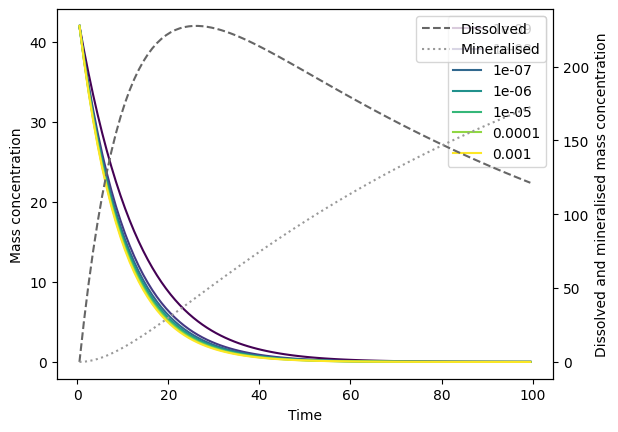

In [2]:
from fragmentmnp import FragmentMNP
from fragmentmnp.examples import minimal_config, minimal_data

# Use the default data in `fragmentmnp.examples`, but
# specify non-zero dissolution and mineralisation rate constants
minimal_data['k_diss'] = 0.1
minimal_data['k_min'] = 0.01

# Run the model and plot the results, passing `plot_dissolution`
# and `plot_mineralisation` to the `plot()` function to plot
# the dissolution and mineralisation output
_ = FragmentMNP(minimal_config, minimal_data).run().plot(plot_dissolution=True,
                                                         plot_mineralisation=True)

As expected, we see particles initially dissolving to the dissolved pool (dashed dark grey line), and then mineralising to the mineralised pool (dotted light grey line) at a slower rate. As the mass of polymer available for dissolution becomes depleted, dissolution slows down, leading to mineralisation removing mass from the dissolved pool.

Dissolution rate constants can be dependent on time and particle surface area, and mineralisation can be dependent on time (see [](./fragmentation-dissolution-rates.ipynb)). The following is an arbitrary example that presumes a constant `k_diss`, but `k_min` which is logistic and increases in a step-like fashion at around 50 days. First we plot `k_min` as a function of time to visualise this logistic dependence:

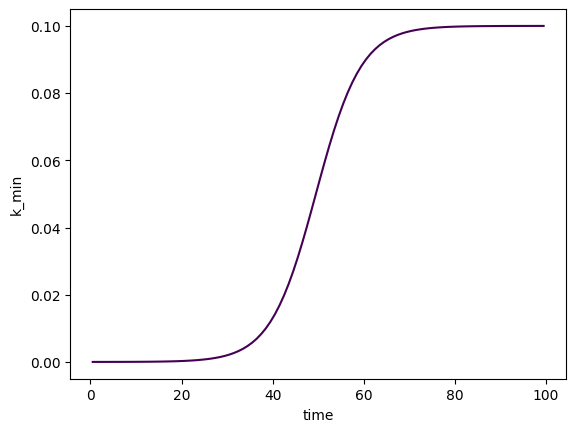

In [5]:
import matplotlib.pyplot as plt

# Specify a logistic dependence
minimal_data['k_min'] = {
    'k_f': 0.1,
    'D_t': 1,
    'delta1_t': 10
}

# Create the model and plot k_min
fmnp = FragmentMNP(minimal_config, minimal_data)
plt.plot(fmnp.t_grid, fmnp.k_min)
plt.xlabel('time')
plt.ylabel('k_min');


Now we run the model and plot the results:

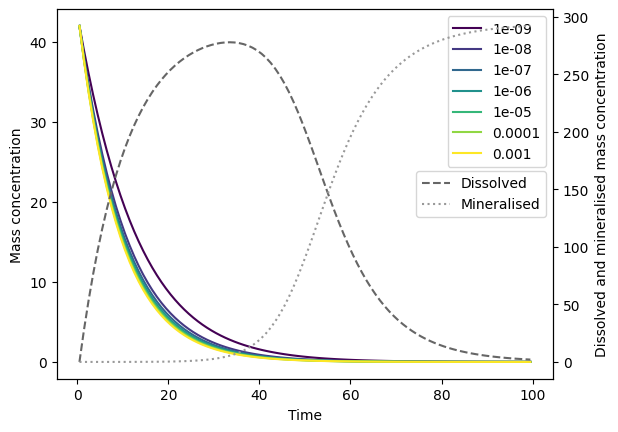

In [5]:
_ = fmnp.run().plot(plot_dissolution=True,
                    plot_mineralisation=True)

As you can see, mineralisation of the dissolved pool now does not being until around 30 days, when `k_min` starts increasing.

As a final example, we demonstrate that mineralisation only happens from the dissolved pool, by setting `k_diss` to zero:

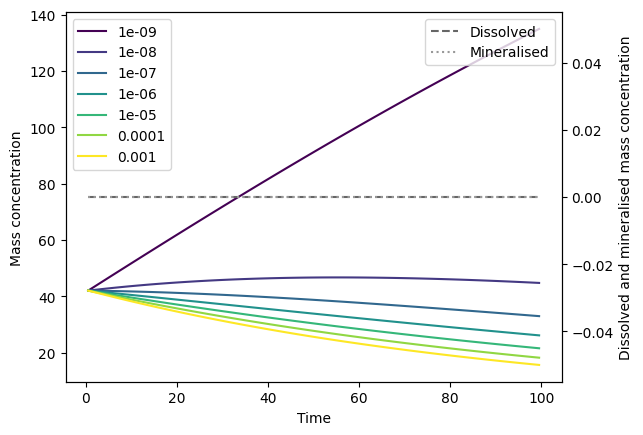

In [6]:
minimal_data['k_diss'] = 0
# We set an arbitrarily large k_min simply to demonstrate
# that if k_diss=0 and no initial concentration of dissolved
# organics is present, then mineralisation cannot happen
minimal_data['k_min'] = 100

# We expect the dissolved and mineralised pools to be zero
_ = FragmentMNP(minimal_config, minimal_data).run().plot(plot_dissolution=True,
                                                         plot_mineralisation=True)